In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

start, end, step = 0, 1, 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.shape)
y = weight * X + bias

X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X)

50

In [ ]:
# Splitting the data into train and test sets.

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

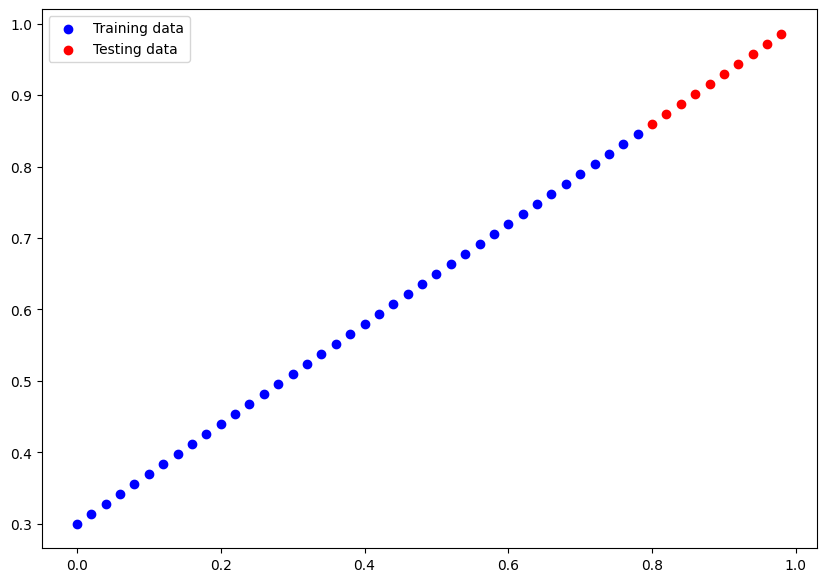

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c='blue', label='Training data')
  plt.scatter(test_data, test_labels, c='red', label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='pink', label='Predictions')

  plt.legend()
  plt.show()

plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.tensor) -> torch.tensor:
    return x * self.weights + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


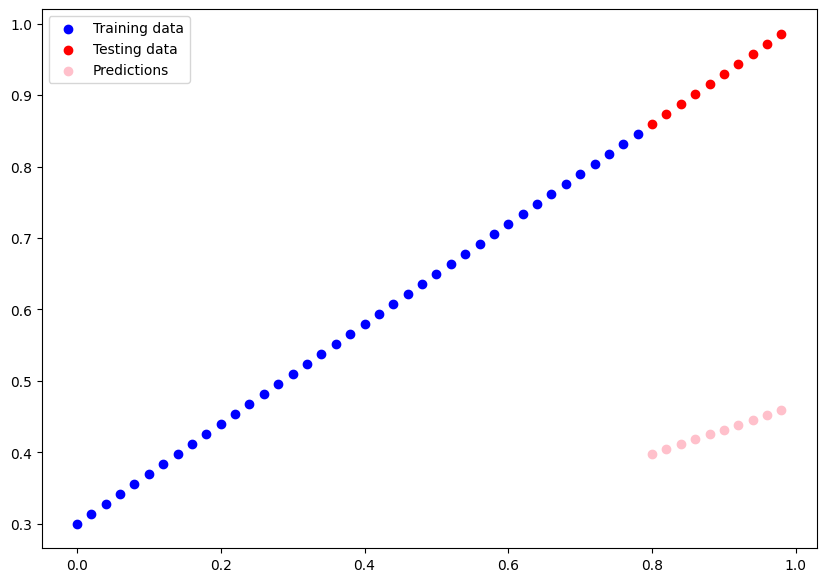

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
torch.manual_seed(42)

epochs = 100

# 0. Loop through the data
for epoch in range(epochs):

  #  Set the model to training mode
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tarcking

Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.053148526698350906
Loss: 0.05181945487856865
Loss: 0.05069301277399063
Loss: 0.0498228520154953
Loss: 0.04895269125699997
Loss: 0.04819351062178612
Loss: 0.047531817108392715
Loss: 0.04692792519927025
Loss: 0.04642331600189209
Loss: 0.04591871052980423
Loss: 0.04543796554

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])

In [ ]:
with torch.inference_mode():

  y_preds_new = model_0(X_test)

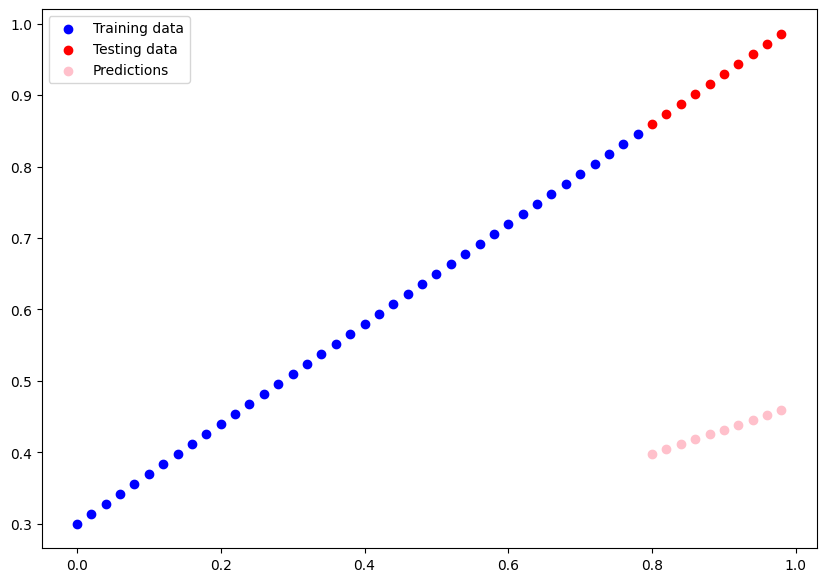

In [ ]:
plot_predictions(predictions=y_preds)

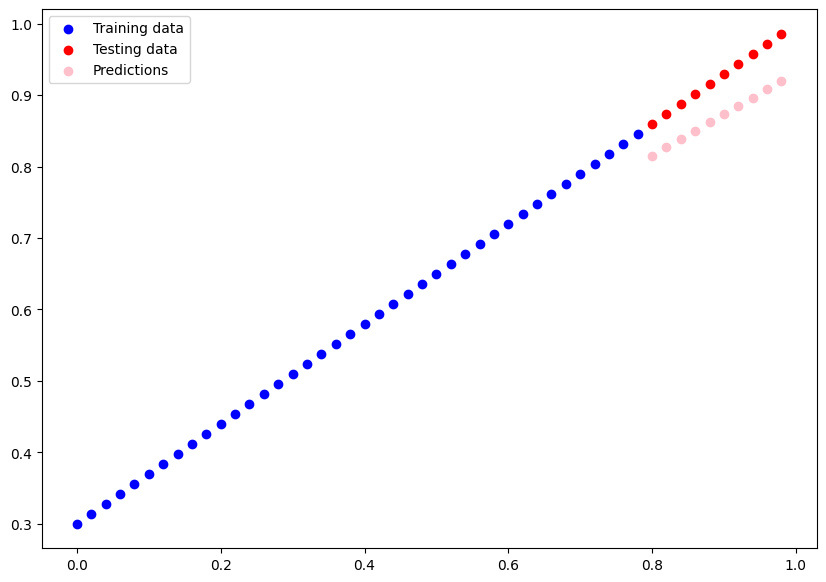

In [ ]:
plot_predictions(predictions=y_preds_new)